In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Sets/pokemon.csv')

Usamos cut para crear una variable categórica. Qcut va a separar la variable en q partes de igual tamaño y les asignará una etiqueta.

In [3]:
df['defense_q'] = pd.qcut(df['defense'], q = 4, labels = ['Low', 'Mid', 'High', 'Very high'])

Creamos un df con menos columnas para aclarar algunos ejemplos.

In [33]:
df_reduc = df[['attack','type1','generation','is_legendary','sp_attack', 'defense_q']]

# Pivot, crosstab, stack, unstack

## Pivot_table

Todo lo que puedas hacer con un pivot se puede hacer con un groupby. Es simplemente una forma más rápida de llegar a ciertas configuraciones de los datos.

In [5]:
df.pivot_table(index = 'generation',
               values = 'attack',
               aggfunc = 'median')

,attack
generation,
1,70.0
2,67.5
3,70.0
4,80.0
5,77.5
6,69.5
7,80.0


Puedes agregar resultados por columna e índice.

In [6]:
df.pivot_table(index = 'generation',
               columns = 'type1',
               values = 'attack',
               aggfunc = 'median')

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,60.0,NaN,84.0,60.0,57.5,105.0,90.0,NaN,50.0,70.0,82.5,67.5,60.0,76.0,49.0,80.0,NaN,66.0
2,65.0,85.0,NaN,59.0,40.0,65.0,69.5,NaN,60.0,55.0,75.0,52.5,70.0,90.0,72.0,92.0,102.5,70.0
3,48.5,87.5,110.0,47.5,NaN,80.0,85.0,NaN,72.5,69.0,85.0,55.0,67.5,73.0,40.0,88.0,90.0,74.0
4,72.5,120.0,90.0,70.0,50.0,107.5,90.0,NaN,86.0,89.0,103.5,80.0,82.0,76.5,75.0,67.5,89.0,69.0
5,72.5,85.0,120.0,85.0,NaN,105.0,91.5,100.0,40.0,60.0,85.0,67.5,83.0,72.5,55.0,120.5,85.0,75.0
6,35.0,92.0,87.5,55.0,65.0,92.0,68.5,50.0,85.0,78.0,NaN,93.0,53.0,67.5,48.0,83.0,95.0,63.0
7,70.0,101.0,75.0,98.0,52.0,120.0,78.0,NaN,82.5,65.0,112.5,NaN,90.0,58.0,96.0,82.5,98.0,70.0


Puedes llenar espacios nulos con algún valor.

In [7]:
df.pivot_table(index = 'generation',
               columns = 'type1',
               values = 'attack',
               aggfunc = 'median',
               fill_value = 'No disponible')

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,60.0,No disponible,84.0,60.0,57.5,105.0,90.0,No disponible,50.0,70.0,82.5,67.5,60.0,76.0,49.0,80.0,No disponible,66.0
2,65.0,85.0,No disponible,59.0,40.0,65.0,69.5,No disponible,60.0,55.0,75.0,52.5,70.0,90.0,72.0,92.0,102.5,70.0
3,48.5,87.5,110.0,47.5,No disponible,80.0,85.0,No disponible,72.5,69.0,85.0,55.0,67.5,73.0,40.0,88.0,90.0,74.0
4,72.5,120.0,90.0,70.0,50.0,107.5,90.0,No disponible,86.0,89.0,103.5,80.0,82.0,76.5,75.0,67.5,89.0,69.0
5,72.5,85.0,120.0,85.0,No disponible,105.0,91.5,100.0,40.0,60.0,85.0,67.5,83.0,72.5,55.0,120.5,85.0,75.0
6,35.0,92.0,87.5,55.0,65.0,92.0,68.5,50.0,85.0,78.0,No disponible,93.0,53.0,67.5,48.0,83.0,95.0,63.0
7,70.0,101.0,75.0,98.0,52.0,120.0,78.0,No disponible,82.5,65.0,112.5,No disponible,90.0,58.0,96.0,82.5,98.0,70.0


Puedes agregar márgenes para extender la agregación.

In [8]:
df.pivot_table(index = 'generation',
               columns = 'type1',
               values = 'attack',
               aggfunc = 'median',
               fill_value = 'No existe',
               margins = True)

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,All
generation,,,,,,,,,,,,,,,,,,,
1,60.0,No existe,84.0,60.0,57.5,105.0,90.0,No existe,50.0,70.0,82.5,67.5,60.0,76.0,49.0,80.0,No existe,66.0,70.0
2,65.0,85.0,No existe,59.0,40.0,65.0,69.5,No existe,60.0,55.0,75.0,52.5,70.0,90.0,72.0,92.0,102.5,70.0,67.5
3,48.5,87.5,110.0,47.5,No existe,80.0,85.0,No existe,72.5,69.0,85.0,55.0,67.5,73.0,40.0,88.0,90.0,74.0,70.0
4,72.5,120.0,90.0,70.0,50.0,107.5,90.0,No existe,86.0,89.0,103.5,80.0,82.0,76.5,75.0,67.5,89.0,69.0,80.0
5,72.5,85.0,120.0,85.0,No existe,105.0,91.5,100.0,40.0,60.0,85.0,67.5,83.0,72.5,55.0,120.5,85.0,75.0,77.5
6,35.0,92.0,87.5,55.0,65.0,92.0,68.5,50.0,85.0,78.0,No existe,93.0,53.0,67.5,48.0,83.0,95.0,63.0,69.5
7,70.0,101.0,75.0,98.0,52.0,120.0,78.0,No existe,82.5,65.0,112.5,No existe,90.0,58.0,96.0,82.5,98.0,70.0,80.0
All,65.0,88.0,100.0,65.0,58.5,100.0,79.5,70.0,66.0,68.0,90.0,65.0,75.0,68.5,55.0,89.0,90.0,70.0,75.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

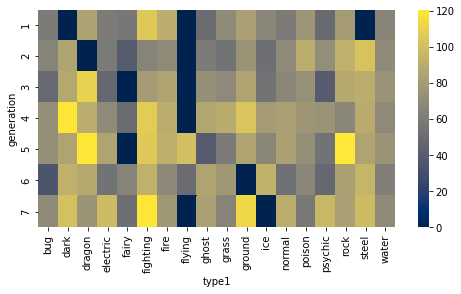

In [10]:
fig, ax = plt.subplots(figsize = (8,4))
_ = sns.heatmap(df.pivot_table(index = 'generation',
               columns = 'type1',
               values = 'attack',
               aggfunc = 'median',
               fill_value = 0), cmap = 'cividis')

## Stack

### Stack solo

Toma la columna más interna y la convierte en el índice más interno.

In [11]:
df_pivot = df.pivot_table(index = 'generation',
               columns = 'type1',
               values = 'attack',
               aggfunc = 'median',
               fill_value = 'No existe')

In [12]:
df_pivot.head(3)

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,60.0,No existe,84.0,60.0,57.5,105.0,90.0,No existe,50.0,70.0,82.5,67.5,60.0,76.0,49.0,80.0,No existe,66.0
2,65.0,85.0,No existe,59.0,40.0,65.0,69.5,No existe,60.0,55.0,75.0,52.5,70.0,90.0,72.0,92.0,102.5,70.0
3,48.5,87.5,110.0,47.5,No existe,80.0,85.0,No existe,72.5,69.0,85.0,55.0,67.5,73.0,40.0,88.0,90.0,74.0


In [13]:
df_pivot.stack().head(3)

generation  type1 
1           bug            60.0
            dark      No existe
            dragon         84.0
dtype: object

### Stack + columnas multinivel

En un pivot puedes pedir varios valores, columnas o índices.

In [14]:
df_pivot = df.pivot_table(index = 'generation',
               columns = 'type1',
               values = ['attack','sp_attack'],
               aggfunc = 'median',
               fill_value = 'No existe')

In [15]:
df_pivot.head(3)

attack                                                           \
type1         bug       dark     dragon electric      fairy fighting  fire   
generation                                                                   
1            60.0  No existe       84.0     60.0       57.5    105.0  90.0   
2            65.0       85.0  No existe     59.0       40.0     65.0  69.5   
3            48.5       87.5      110.0     47.5  No existe     80.0  85.0   

                                   ... sp_attack                             \
type1          flying ghost grass  ...     ghost grass ground    ice normal   
generation                         ...                                        
1           No existe  50.0  70.0  ...     115.0  85.0   37.5  105.0   50.0   
2           No existe  60.0  55.0  ...      85.0  55.0   40.0   62.5   50.0   
3           No existe  72.5  69.0  ...      61.5  78.5   60.0   85.0   55.0   

                                                  
type1      poison psychic  rock      steel water  
generation                                        
1            57.5   102.5  55.0  No existe  67.5  
2            70.0    90.0  55.0       47.5  65.0  
3            73.0    80.0  58.0       55.0  72.0  

[3 rows x 36 columns]

In [16]:
df_pivot.stack().head(3)

attack  sp_attack
generation type1                       
1          bug          60.0       42.5
           dark    No existe  No existe
           dragon       84.0       70.0

### Unstack e índices multinivel

Unstack toma el nivel de índice más interno y lo vuelve la columna más interna.

In [17]:
df_pivot.stack().unstack().head(3)

attack                                                           \
type1         bug       dark     dragon electric      fairy fighting  fire   
generation                                                                   
1            60.0  No existe       84.0     60.0       57.5    105.0  90.0   
2            65.0       85.0  No existe     59.0       40.0     65.0  69.5   
3            48.5       87.5      110.0     47.5  No existe     80.0  85.0   

                                   ... sp_attack                             \
type1          flying ghost grass  ...     ghost grass ground    ice normal   
generation                         ...                                        
1           No existe  50.0  70.0  ...     115.0  85.0   37.5  105.0   50.0   
2           No existe  60.0  55.0  ...      85.0  55.0   40.0   62.5   50.0   
3           No existe  72.5  69.0  ...      61.5  78.5   60.0   85.0   55.0   

                                                  
type1      poison psychic  rock      steel water  
generation                                        
1            57.5   102.5  55.0  No existe  67.5  
2            70.0    90.0  55.0       47.5  65.0  
3            73.0    80.0  58.0       55.0  72.0  

[3 rows x 36 columns]

### Stack para aplanar pivot_table

In [18]:
df_pivot.stack().reset_index()

,generation,type1,attack,sp_attack
0,1,bug,60.0,42.5
1,1,dark,No existe,No existe
2,1,dragon,84.0,70.0
3,1,electric,60.0,95.0
4,1,fairy,57.5,77.5
...,...,...,...,...
121,7,poison,58.0,62.0
122,7,psychic,96.0,120.0
123,7,rock,82.5,77.5
124,7,steel,98.0,118.5


## Melt

Pasa los datos a un formato 'largo' donde tienes variables de identificación en renglones junto con sus respectivos valores.

Melt tiene 2 componentes:  
1. **ID_VAR**
    - Una columna que se mantiene igual  
2. **VALUE_VAR**
    - value --> una columna con el valor correspondiente a cada nombre y set de ID_VARs correspondientes

En vez de describir un pokemon con un renglón, vamos a describirlo con 3 renglones diferentes, uno contiene type1, generation y ataque, el otro contiene type1, generation y sp_attack y el último tiene type1, generation y is_legendary. Ahora en vez de tener 801 registros de  pokemon tengo 801x3 = 2403 registros de pokemon

In [22]:
df_reduc.melt(id_vars = ['type1','generation'],
              value_vars = ['attack','sp_attack','is_legendary'],
              var_name='Tipo de atributo',
              value_name='Valor de atributo')

,type1,generation,Tipo de atributo,Valor de atributo
0,grass,1,attack,49
1,grass,1,attack,62
2,grass,1,attack,100
3,fire,1,attack,52
4,fire,1,attack,64
...,...,...,...,...
2398,steel,7,is_legendary,1
2399,grass,7,is_legendary,1
2400,dark,7,is_legendary,1
2401,psychic,7,is_legendary,1


**regresando al pivot**

Generation queda perdido en el limbo, aunque cada type1 y defense_q asociado se repita 7 veces...

In [19]:
df_pivot.melt(value_name = 'mean attack')

,NaN,type1,mean attack
0,attack,bug,60.0
1,attack,bug,65.0
2,attack,bug,48.5
3,attack,bug,72.5
4,attack,bug,72.5
...,...,...,...
247,sp_attack,water,72.0
248,sp_attack,water,80.0
249,sp_attack,water,80.0
250,sp_attack,water,83.0


Se soluciona así

OJO: todas las demás variables quedan como value_vars

In [20]:
df_pivot.reset_index().melt(id_vars = 'generation',value_name = 'mean attack')

,generation,NaN,type1,mean attack
0,1,attack,bug,60.0
1,2,attack,bug,65.0
2,3,attack,bug,48.5
3,4,attack,bug,72.5
4,5,attack,bug,72.5
...,...,...,...,...
247,3,sp_attack,water,72.0
248,4,sp_attack,water,80.0
249,5,sp_attack,water,80.0
250,6,sp_attack,water,83.0


In [21]:
df_reduc.melt(id_vars = ['type1','generation'],
              value_vars = 'attack')

,type1,generation,variable,value
0,grass,1,attack,49
1,grass,1,attack,62
2,grass,1,attack,100
3,fire,1,attack,52
4,fire,1,attack,64
...,...,...,...,...
796,steel,7,attack,101
797,grass,7,attack,181
798,dark,7,attack,101
799,psychic,7,attack,107


## Crosstab

Es equivalente a Pivot_table y groupbys (lo que hagas con uno puedes hacer con los otros) pero tiene algunas funcionaliadeds agregadas. Pivot_table viene de Excel y Crosstab es original de Pandas y suele usarse para analizar pares de variables categóricas por frecuencia.

In [34]:
pd.crosstab(df_reduc['is_legendary'], df_reduc['defense_q'])

defense_q,Low,Mid,High,Very high
is_legendary,,,,
0,219,219,150,143
1,3,5,20,42


In [36]:
pd.crosstab(df_reduc['is_legendary'], df_reduc['defense_q'],
            margins = True,
            normalize = True)

defense_q,Low,Mid,High,Very high,All
is_legendary,,,,,
0,0.273408,0.273408,0.187266,0.178527,0.912609
1,0.003745,0.006242,0.024969,0.052434,0.087391
All,0.277154,0.279650,0.212235,0.230961,1.000000


In [ ]:
pd.crosstab(df_reduc['is_legendary'], df_reduc['defense_q'],
            margins = True,
            normalize = True,)

In [40]:
pd.crosstab(df_reduc['is_legendary'], df_reduc['defense_q'],
            margins = True,
            normalize = False,
            values = df_reduc['attack'],
            aggfunc = 'median')

defense_q,Low,Mid,High,Very high,All
is_legendary,,,,,
0,53.0,70.0,80.0,94.0,70
1,53.0,125.0,101.5,103.0,104
All,53.0,71.5,85.5,95.0,75


In [44]:
pd.crosstab(df_reduc['is_legendary'], [df_reduc['type1'],df_reduc['defense_q']],
            values = df_reduc['attack'],
            aggfunc = 'median')

type1           bug                        dark                        dragon  \
defense_q       Low   Mid  High Very high   Low    Mid  High Very high    Low   
is_legendary                                                                    
0              45.0  57.5  70.0     105.0  65.0   92.5  91.0      85.0   64.0   
1             137.0   NaN   NaN     129.5   NaN  101.0  90.0     131.0    NaN   

type1               ...   rock            steel                       water  \
defense_q      Mid  ...   High Very high    Low   Mid  High Very high   Low   
is_legendary        ...                                                       
0             85.5  ...   84.5      81.0  150.0  55.0  39.5      89.5  50.0   
1              NaN  ...  129.0     130.0    NaN   NaN   NaN      97.5   NaN   

type1                                
defense_q      Mid   High Very high  
is_legendary                         
0             65.0   78.0      95.0  
1              NaN  111.0      87.5  

[2 rows x 70 columns]